<a href="https://colab.research.google.com/github/Carlosmagnobrusil/CarlosBrusil_projects/blob/main/Tarea_semana_3_CB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deber semana 3**
## *Creado por: Carlos Brusil*



*   Fecha de Creación: 28 de enero de 2023 
*   Fechad de actualización: 30 de enero de 2023
*   Descripción: Modelado de datos discretos Grafos


- Se ha hablado mucho durante los últimos años sobre la necesidad de que el departamento de RRHH sea más estratégico. 

- Aparte de cualquier debate filosófico sobre la verdadera naturaleza de la "estrategia" y el pensamiento estratégico, lo que esto normalmente significa es que los líderes empresariales quieren que los departamentos de RRHH sean más como sus departamentos de marketing: analíticos, orientados a los resultados y capaces de vincular directamente sus actividades con los resultados deseados por la empresa. 

- Las empresas de marketing de hoy dependen bastante del análisis predictivo y la minería de datos/ciencia de datos. 
  - Es probable que el futuro de los recursos humanos se encuentre en este mismo camino. 

- Este ejercicio explora un problema potencial con el que un profesional de RRHH estratégico-analítico podría razonablemente esperar enfrentarse.

## Problema: Creative HR

In [2]:
import pandas as pd #importo la libreria panda permite manipular y molderar los datos 
import numpy as np #importo la libreria numpy manipular y molderar los datos 
import matplotlib.pyplot as plt #importo libreria matplotlib que es una libreria que me permite realizar graficas en 2 dimensiones de de mis datos
import seaborn as sns #Esta libreria nos permite modificar la vizualizacion de los datos atraves de los coleres y mejorar presetancion de los mismo 

In [4]:
hr_df = pd.read_csv("https://raw.githubusercontent.com/marsgr6/EN-online/8a1cee296279c274d8f05f3905fce97c1f7636a2/data/CHR_data.csv") #llamo a la base desde un repositorio de Github
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
hr_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
#Obtengo informacion de mi data frame 

hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

###1. Cuál es la distribución de la edad (Age).

- Escriba el código Python para replicar el gráfico a continuación.

- El diagrama de densidad para la variable Age.

- Una distribución normal X∼N(μ,σ)X \sim N(\mu, \sigma)X∼N(μ,σ), donde μ\muμ es la media y σ\sigmaσ la desviación estándar de los datos (Age).

In [10]:
#preparo mi set para modelar la distribucion normal 

from scipy.stats import norm

ddof = 0 #estableco la verosimilitud que debe llevar una normal en este caso es 0 ya que debe ser neutra

media = hr_df.Age.mean()

dsv = hr_df.Age.std(ddof)
#delimito los parametros de mi distrubucion normal la cual es la media y desviacion standar 

prmt = media , dsv

prmt

(36.923809523809524, 9.135373489136732)

In [11]:
x = np.linspace(hr_df.Age.min(),hr_df.Age.max(),100) #defino el rango de mis datos y cuantos datos deseo crear 

In [13]:
pdf_x = norm.pdf(x, media, dsv) #establezco el modelo de pdf de una normal

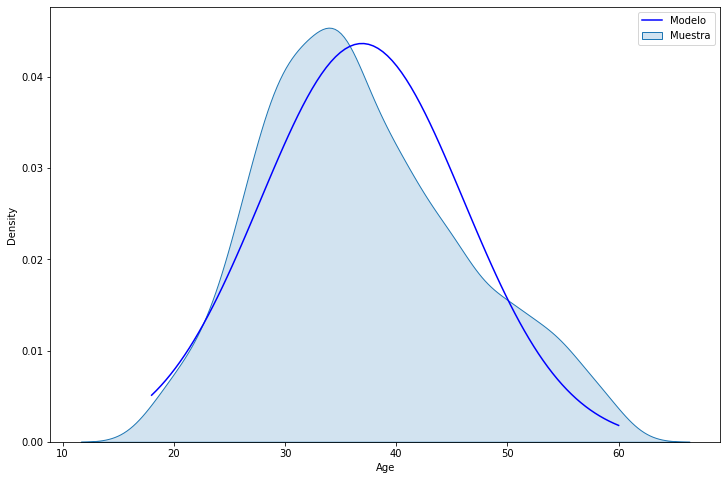

In [19]:
plt.figure(figsize=(12,8))

sns.kdeplot(data=hr_df, x="Age", fill=True, common_norm=False, alpha=0.2, label="Muestra") #dentro del grafico esta sera nuestra distribucion original de los datos

plt.plot(x, pdf_x, c='b', label='Modelo') #La linea modelada con las especificaciones de la edad age 

plt.legend()

##### La distribucion de la variable edad como se puede observar en el grafico es una 

### 2. Cuál es la probabilidad de que un trabajador de Creative HR tenga 30 años o menos.

- Responda usando los datos observados y el modelo asumido

In [27]:
z = np.round(30-media)/dsv

In [30]:
print("P (X<30) = ", np.round(norm.cdf(z)*100,2),"%")

P (X<30) =  22.18 %


####La probabilidad de que una persona se encuentre en una edad menor a los 30 años es del 22.18%

In [47]:
m_x_yes = hr_df.query('Attrition == "Yes"')["Age"].mean()
ds_yes = hr_df.query('Attrition == "Yes"')["Age"].std()

In [55]:
m_x_no = hr_df.query('Attrition == "No"')["Age"].mean()
ds_no = hr_df.query('Attrition == "No"')["Age"].std()

In [ ]:
x = np.linspace(hr_df.Age.min(),hr_df.Age.max(),100)

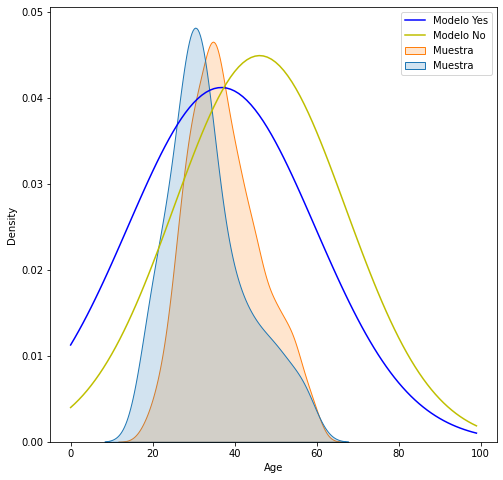

In [60]:
plt.figure(figsize=(8,8))

sns.kdeplot(data=hr_df, x="Age", fill=True,hue = "Attrition", common_norm=False, alpha=0.2, label="Muestra") #dentro del grafico esta sera nuestra distribucion original de los datos

plt.plot(norm.pdf(x, m_x_yes, ds_yes), label = "Modelo Yes", c= "b")
plt.plot(norm.pdf(x, m_x_no, ds_no), label = "Modelo No", c="y")

plt.legend()


### 4. Cuál es la probabilidad de que un trabajador que ya no se encuentra en Creative HR tenga 30 años o menos.

In [61]:
z = np.round(30-m_x_no)/ds_no 

In [62]:
print("P (X<30) = ", np.round(norm.cdf(z)*100,2),"%")

P (X<30) =  18.4 %


#### La probabilidad de que una persona ya no se encuentre en la empresa y tenga menos de 30 años es de edad es de 18.4%

### 5. Discuta qué tan adecuada considera la distribución usada para modelar nuestros datos observados.

#### Tras observar las graficas y los datos obtenidos, creo que la distribucion normal para esta variable continua fue acertada.